In [ ]:
import numpy as np
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Import required libraries
import pandas as pd
from scipy.io import arff

# Path to your ARFF file in Google Drive
# Replace with your actual file path
file_path = '/content/Rice_Cammeo_Osmancik.arff'

# Read the ARFF file
data, meta = arff.loadarff(file_path)

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# If there are byte string columns, decode them
for column in df.select_dtypes([object]):
    df[column] = df[column].str.decode('utf-8')

# Now df contains your rice dataset
print(df.head())
print("\nDataset shape:", df.shape)

      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0      15617.0  0.572896  Cammeo  
1      15072.0  0.615436  Cammeo  
2      14954.0  0.693259  Cammeo  
3      13368.0  0.640669  Cammeo  
4      15262.0  0.646024  Cammeo  

Dataset shape: (3810, 8)


In [ ]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


In [ ]:
df.isnull().sum()

,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Eccentricity,0
Convex_Area,0
Extent,0
Class,0


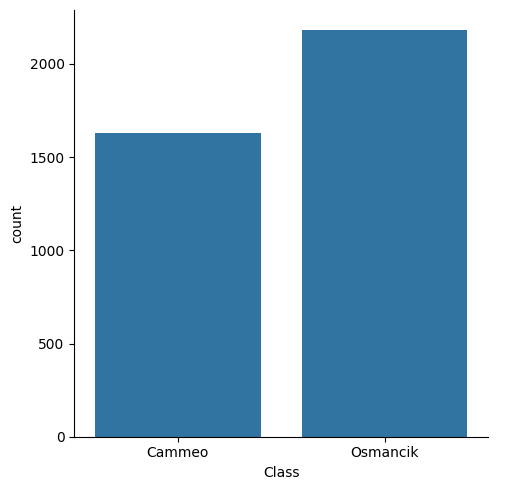

In [ ]:
sns.catplot(data=df, x='Class', kind='count');

In [ ]:
df['Class'] = df['Class'].map({'Cammeo':1,'Osmancik':0})

In [ ]:
X = df.iloc[:, 0:6].values
Y = df.iloc[:, 7].values

In [ ]:
scaler_rice = StandardScaler()
X = scaler_rice.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((3048, 6), (3048,))

In [ ]:
X_test.shape, y_test.shape

((762, 6), (762,))

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
GMix = GaussianMixture(n_components=2)
GMix.fit(X_train, y_train)
GMix_model = GMix.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report
print('Accuracy: ', accuracy_score(y_test, GMix_model))
print('Precision: ', precision_score(y_test, GMix_model))
print('F1: ', f1_score(y_test, GMix_model))
print('Recall: ', recall_score(y_test, GMix_model))

Accuracy:  0.1010498687664042
Precision:  0.04922279792746114
F1:  0.05255878284923928
Recall:  0.05637982195845697


HyperParameter tuning

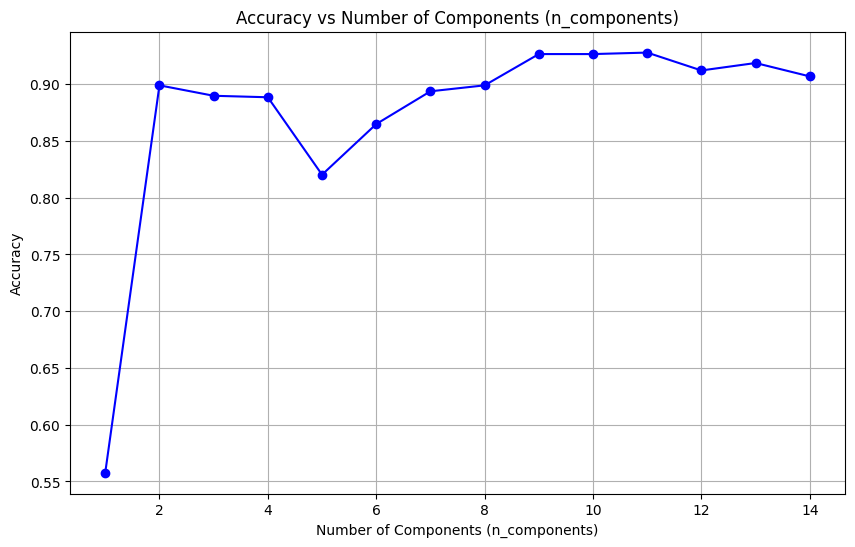

Best n_components: 11
Highest Accuracy: 0.9278215223097113


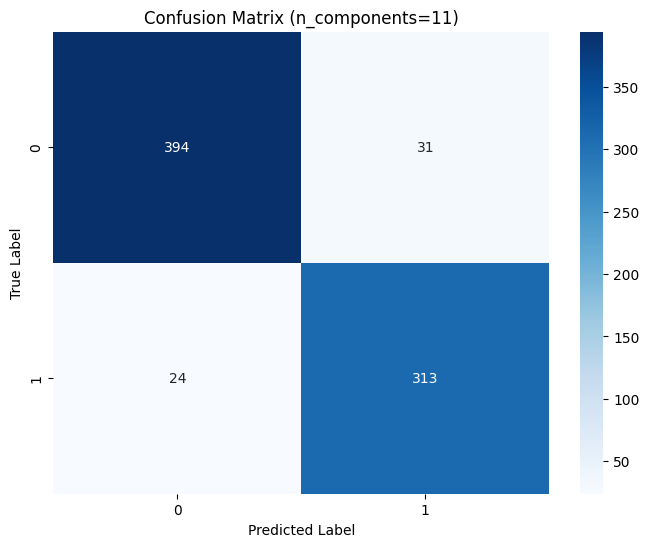

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize a range of n_components to test
n_components_range = range(1, 15)  # Test for 1 to 14 components
accuracy_scores = []

# Loop through different values of n_components
for n_components in n_components_range:
    # Initialize and train the GMM
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_train)

    # Predict clusters for the test set
    y_pred = gmm.predict(X_test)

    # Map the predicted clusters to the actual class labels
    # Use a mapping based on the training data
    cluster_to_label = {}
    for cluster in range(n_components):
        # Find the most common true label for each cluster
        mask = (gmm.predict(X_train) == cluster)
        if mask.sum() > 0:
            most_common_label = pd.Series(y_train[mask]).mode()[0]  # Convert to Pandas Series
            cluster_to_label[cluster] = most_common_label

    # Map the predicted clusters to labels
    y_pred_mapped = pd.Series(y_pred).map(cluster_to_label)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_mapped)
    accuracy_scores.append(accuracy)

# Plot accuracy vs n_components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Number of Components (n_components)')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Find the best n_components based on the highest accuracy
best_n_components = n_components_range[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f"Best n_components: {best_n_components}")
print(f"Highest Accuracy: {best_accuracy}")

# Train the model with the best n_components
gmm = GaussianMixture(n_components=best_n_components, random_state=42)
gmm.fit(X_train)

# Predict clusters for the test set
y_pred = gmm.predict(X_test)

# Map the predicted clusters to the actual class labels
cluster_to_label = {}
for cluster in range(best_n_components):
    mask = (gmm.predict(X_train) == cluster)
    if mask.sum() > 0:
        most_common_label = pd.Series(y_train[mask]).mode()[0]
        cluster_to_label[cluster] = most_common_label

# Map the predicted clusters to labels
y_pred_mapped = pd.Series(y_pred).map(cluster_to_label)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_mapped)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix (n_components={best_n_components})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Compute the negative log-likelihood loss (a common measure for probabilistic models like GMM) for both the training and testing datasets. Higher values indicate a better fit.

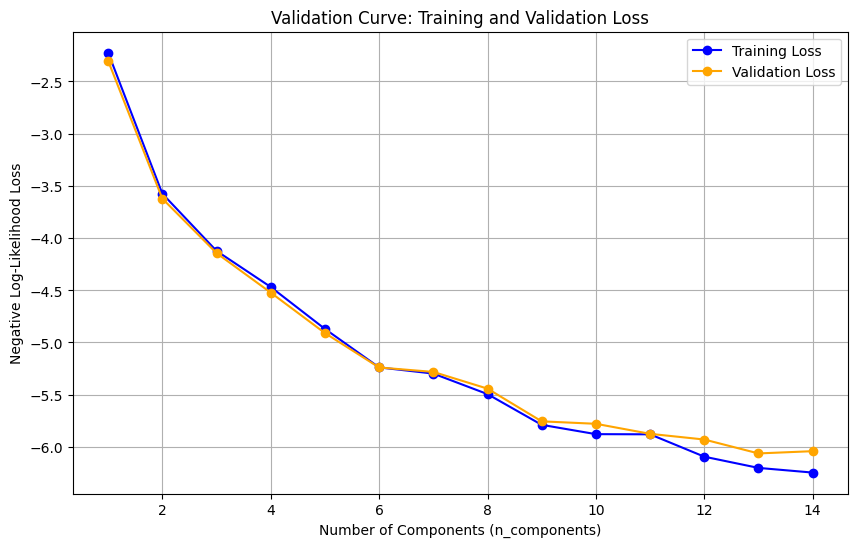

In [ ]:

train_losses = []
test_losses = []

# Loop through different values of n_components
for n_components in n_components_range:
    # Train the GMM
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_train)

    # Compute negative log-likelihood loss for training and testing datasets
    train_loss = -gmm.score(X_train)  # Average log-likelihood per sample (negative)
    test_loss = -gmm.score(X_test)   # Average log-likelihood per sample (negative)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, train_losses, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.plot(n_components_range, test_losses, marker='o', linestyle='-', color='orange', label='Validation Loss')
plt.title('Validation Curve: Training and Validation Loss')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Negative Log-Likelihood Loss')
plt.legend()
plt.grid()
plt.show()

Good Fit:
Both training and validation losses are low and close to each other for some optimal range of n_components.